In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA       


In [130]:
train = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/train.csv")
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428


In [131]:
train['sub_id'] = train['month_id'].astype(str) + train['merchant_id'].astype(str)
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106,202307merchant_43992
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918,202301merchant_43992
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452,202305merchant_43992
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787,202308merchant_43992
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428,202302merchant_43992


In [132]:
sub = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/sample_submission.csv")
sub.head(1)

,id,net_payment_count
0,202311merchant_36004,0


In [133]:
train["month_id"] = pd.to_datetime(train["month_id"], format="%Y%m")

train = train.sort_values(by='month_id')
train['month_id'] = train['month_id'].astype('datetime64[ns]')

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291142 entries, 63650 to 291141
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   merchant_id           291142 non-null  object        
 1   month_id              291142 non-null  datetime64[ns]
 2   merchant_source_name  291142 non-null  object        
 3   settlement_period     291142 non-null  object        
 4   working_type          291142 non-null  object        
 5   mcc_id                291142 non-null  object        
 6   merchant_segment      291142 non-null  object        
 7   net_payment_count     291142 non-null  int64         
 8   sub_id                291142 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 22.2+ MB


In [86]:
#train.index = pd.to_period(train.index, freq='M')

#train.index = pd.to_datetime(train.index)
#month_index = train.index.to_period('M')

#train.index.to_period("M")
#train_index = train['month_id'].strftime('%Y-%m')

In [134]:
train['month_id']=pd.to_datetime(train['month_id'])
train.set_index('month_id', inplace=True)

train.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

In [135]:
train[["merchant","id"]] = train["merchant_id"].str.split("_", expand=True)


In [136]:
train.drop(['merchant_id','merchant'], axis=1, inplace=True)
train.head()

,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id,id
month_id,,,,,,,,
2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_130,Segment - 4,6,202001merchant_66740,66740
2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_153,Segment - 4,3,202001merchant_12444,12444
2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_168,Segment - 4,3,202001merchant_40154,40154
2020-01-01,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_25,Segment - 2,787,202001merchant_33179,33179
2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_31,Segment - 4,5,202001merchant_16977,16977


In [137]:
result = train.sort_values(by=['id'])
result.head()

,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,sub_id,id
month_id,,,,,,,,
2022-10-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,202210merchant_1,1
2021-08-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,202108merchant_1,1
2022-03-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,9,202203merchant_10,10
2021-11-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,6,202111merchant_10,10
2022-04-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,4,202204merchant_10,10


In [ ]:
result = train.groupby('id')
result.describe()

In [138]:
ts = pd.DataFrame({"net_payment_count":result['net_payment_count'],
                  "id":result['id']
                  })
ts.head()



,net_payment_count,id
month_id,,
2022-10-01,3,1
2021-08-01,3,1
2022-03-01,9,10
2021-11-01,6,10
2022-04-01,4,10


<Axes: xlabel='month_id'>

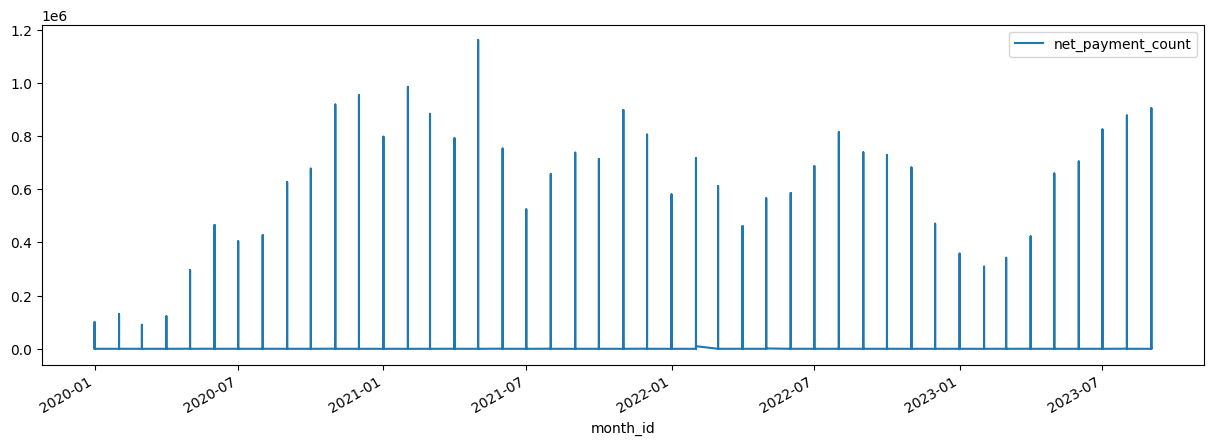

In [139]:
ts.plot(figsize=(15,5))


<Axes: xlabel='month_id', ylabel='net_payment_count'>

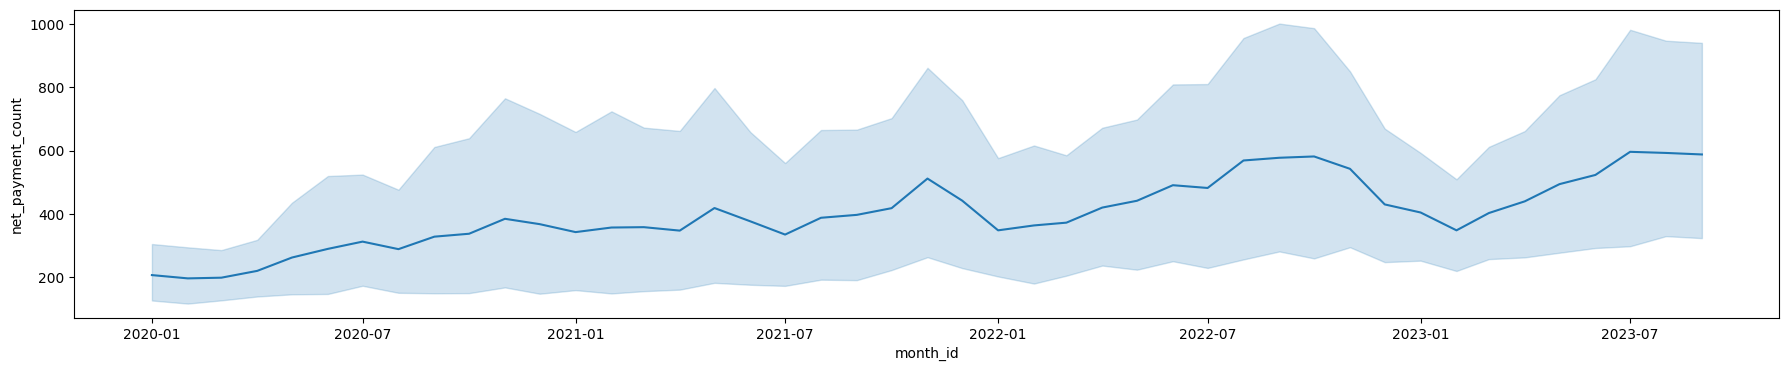

In [140]:
plt.figure(figsize=(22,4))
sns.lineplot(data = ts.reset_index(), x="month_id", y="net_payment_count")

In [141]:
ts.index.sort_values()

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

In [142]:
end_date = ts.index[-1]
end_date

Timestamp('2022-11-01 00:00:00')

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

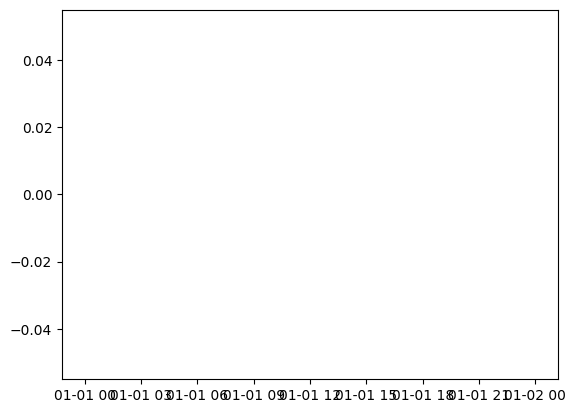

In [79]:

# Tüm ayları içeren bir zaman serisi oluşturun
full_date_range = pd.date_range(start='2020-01-01', end='2023-09-01', freq='MS')
full_ts = pd.DataFrame(index=full_date_range)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

# Eksik verileri doldurun (örneğin, forward fill)
df_full_filled = df_full.ffill()

# Belirli bir 'id' için veriyi seçin
merchant_id = 33179
merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

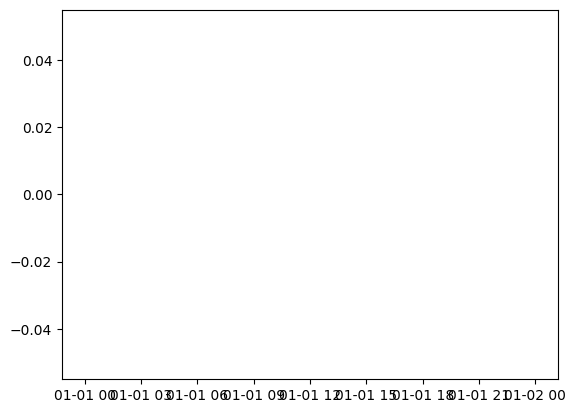

In [22]:

# Tüm ayları içeren bir zaman serisi oluşturun
full_date_range = pd.date_range(start='2020-01-01', end='2023-09-01', freq='MS')
full_ts = pd.DataFrame(index=full_date_range)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

# Eksik verileri doldurun (örneğin, forward fill)
df_full_filled = df_full.ffill()

# Belirli bir 'id' için veriyi seçin
merchant_id = 33179
merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
start_date = df_full_filled.index[-3]  # 2023'ün son 3 ayı
end_date = df_full_filled.index[-1]
predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = predictions.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Tahminleri DataFrame olarak oluşturun
prediction_df = pd.DataFrame({
    'Actual_Data': df_full_filled[df_full_filled['id'] == merchant_id]['net_payment_count'][-3:].values
}, index=ts_log.index[-3:])

# Tahminleri göster
print(prediction_df)

In [26]:
df_full_filled['id'].sort_values

<bound method Series.sort_values of 2020-01-01    10005
2020-01-01    10034
2020-01-01    10052
2020-01-01    10078
2020-01-01    10134
              ...  
2023-09-01     9946
2023-09-01     9965
2023-09-01     9982
2023-09-01     9984
2023-09-01     9991
Name: id, Length: 291142, dtype: object>

In [ ]:
# Tüm ayları içeren bir zaman serisi oluşturun
full_ts = pd.DataFrame(index=ts.index)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

df_full_filled = df_full.ffill()

# Her bir 'id' için tahmin yapın
unique_ids = df_full_filled['id'].unique()

for merchant_id in unique_ids:
    # Belirli bir 'id' için veriyi seçin
    merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

    # Log dönüşümü yapın
    ts_log = np.log(merchant_data['net_payment_count'])

    # İlk farkı alın (differencing)
    ts_log_diff = ts_log - ts_log.shift()
    plt.plot(ts_log_diff)
    ts_log_diff.dropna(inplace=True)

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
    results_ARIMA = model.fit()

    # Tahminleri alın
    start_date = df_full_filled.index[-3]  # 2023'ün son 3 ayı
    end_date = df_full_filled.index[-1]
    predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
    y_pred_df = predictions.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

    # Tahminleri indeks ile eşleştirin
    y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
    y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

    # Tahminleri DataFrame olarak oluşturun
    prediction_df = pd.DataFrame({
        'Actual_Data': df_full_filled[df_full_filled['id'] == merchant_id]['net_payment_count'][-3:].values,
        'ARIMA_Predictions': y_pred_out.values,
    }, index=ts_log.index[-3:])

    # Tahminleri göster
    print(f"Merchant ID: {merchant_id}")
    print(prediction_df)
    print("\n")

    # İsteğe bağlı: Tahminleri grafik üzerinde göstermek için
    plt.plot(merchant_data['net_payment_count'], label='Actual Data')
    plt.plot(y_pred_out, color='yellow', label='ARIMA Predictions')
    plt.title(f'Merchant ID: {merchant_id}')
    plt.legend()
    plt.show()


In [31]:
unique_ids = df_full_filled['id'].unique()
unique_ids

array(['10005', '10034', '10052', ..., '9373', '9383', '9545'],
      dtype=object)

In [23]:
ts.isnull().sum()

net_payment_count    0
id                   0
dtype: int64

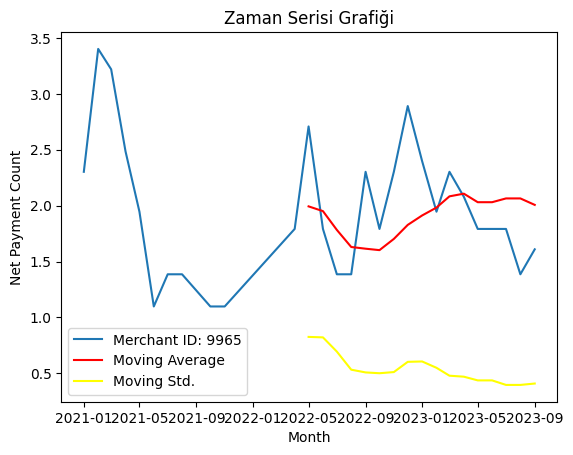

In [143]:
def plot_merchant(ts, id):
    data = ts[ts['id'] == id]
    merchant_data = data.sort_values(by=['month_id'])

    
    ts_log = np.log(merchant_data['net_payment_count'])
    moving_avg = ts_log.rolling(12).mean()
    moving_std = ts_log.rolling(12).std()
    #plt.plot(ts, color='red')
    plt.plot(ts_log, label=f'Merchant ID: {id}')
    plt.plot(moving_avg, color='red', label='Moving Average')
    plt.plot(moving_std, color='yellow', label='Moving Std.')

    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('Zaman Serisi Grafiği')

    plt.show()


plot_merchant(ts,'9965')

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for Merchant ID 33179:

                 Forecast
2023-10-01  511977.938063
2023-11-01  511977.938063
2023-12-01  511977.938063


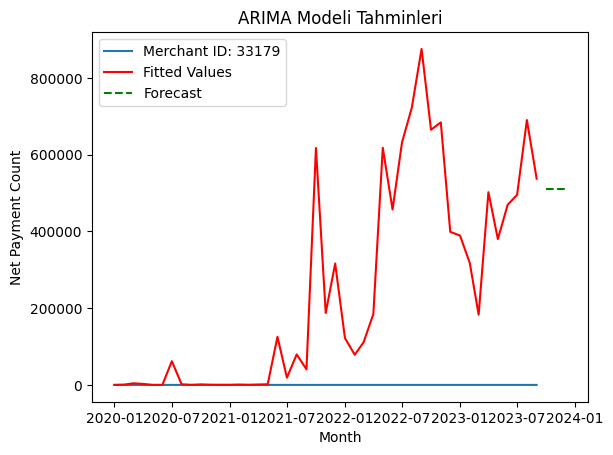

In [144]:
def forecast_merchant(ts, merchant_id, forecast_periods=3):
    data = ts[ts['id'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=forecast_periods)

    # Tahminleri indeks ile eşleştirin
    forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {merchant_id}:\n")
    print(forecast_df)

    # Grafik üzerinde gösterim
    plt.plot(ts_log, label=f'Merchant ID: {merchant_id}')
    plt.plot(np.exp(results_ARIMA.fittedvalues), color='red', label='Fitted Values')
    plt.plot(forecast_df, color='green', linestyle='--', label='Forecast')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('ARIMA Modeli Tahminleri')

    plt.show()

# Belirli bir 'id' için 3 aylık tahmin yapın
forecast_merchant(ts, '33179', forecast_periods=3)

In [145]:
merchant_data = ts[ts['id'] == '33179'].sort_values(by=['month_id'])
merchant_data.head()


,net_payment_count,id
month_id,,
2020-01-01,787,33179
2020-02-01,2499,33179
2020-03-01,3070,33179
2020-04-01,23,33179
2020-05-01,4,33179


In [101]:
forecast_periods=3
# Tüm ayları içeren bir zaman serisi oluşturun
#full_date_range = pd.date_range(start='2020-01-01', end='2023-07-01', freq='MS')
forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]

full_ts = pd.DataFrame(index=forecast_index)

# Veri setini aylık olarak birleştirin
df_full = full_ts.merge(ts, how='left', left_index=True, right_index=True)

# Eksik verileri doldurun (örneğin, forward fill)
df_full_filled = df_full.ffill()

# Belirli bir 'id' için veriyi seçin
merchant_id = 33179
merchant_data = df_full_filled[df_full_filled['id'] == merchant_id]

# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
start_date = df_full_filled.index[-3]  # 2023'ün son 3 ayı
end_date = df_full_filled.index[-1]
predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = predictions.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Tahminleri DataFrame olarak oluşturun
prediction_df = pd.DataFrame({
    'Actual_Data': df_full_filled[df_full_filled['id'] == merchant_id]['net_payment_count'][-3:].values
}, index=ts_log.index[-3:])

# Tahminleri göster
print(prediction_df)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

merchant_data = ts[ts['id'] == '33179']

data = merchant_data['net_payment_count']
seasonal = True

model = pm.auto_arima(data, 
                      m=12,               # frequency of series                      
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3,   # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1257.380, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1255.136, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1249.738, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1233.400, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1253.184, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1231.933, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1233.045, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1233.959, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1236.198, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1248.102, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1234.853, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1227.227, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1228.777, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12]

In [94]:
TEST_SIZE = 10
train, test = merchant_data.iloc[:-TEST_SIZE], merchant_data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], ts[ts['id'] == '33179'].shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape


((0, 2), (0,), (0, 2), (45,))

In [95]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

TypeError: predict() missing 1 required positional argument: 'params'

In [30]:
cf= pd.DataFrame(confint)


In [31]:
pred_df = x_test.copy()


In [33]:
ts

,net_payment_count,id
month_id,,
2022-10-01,3,1
2021-08-01,3,1
2022-03-01,9,10
2021-11-01,6,10
2022-04-01,4,10
...,...,...
2023-06-01,4,9993
2022-12-01,3,9993
2023-02-01,3,9993


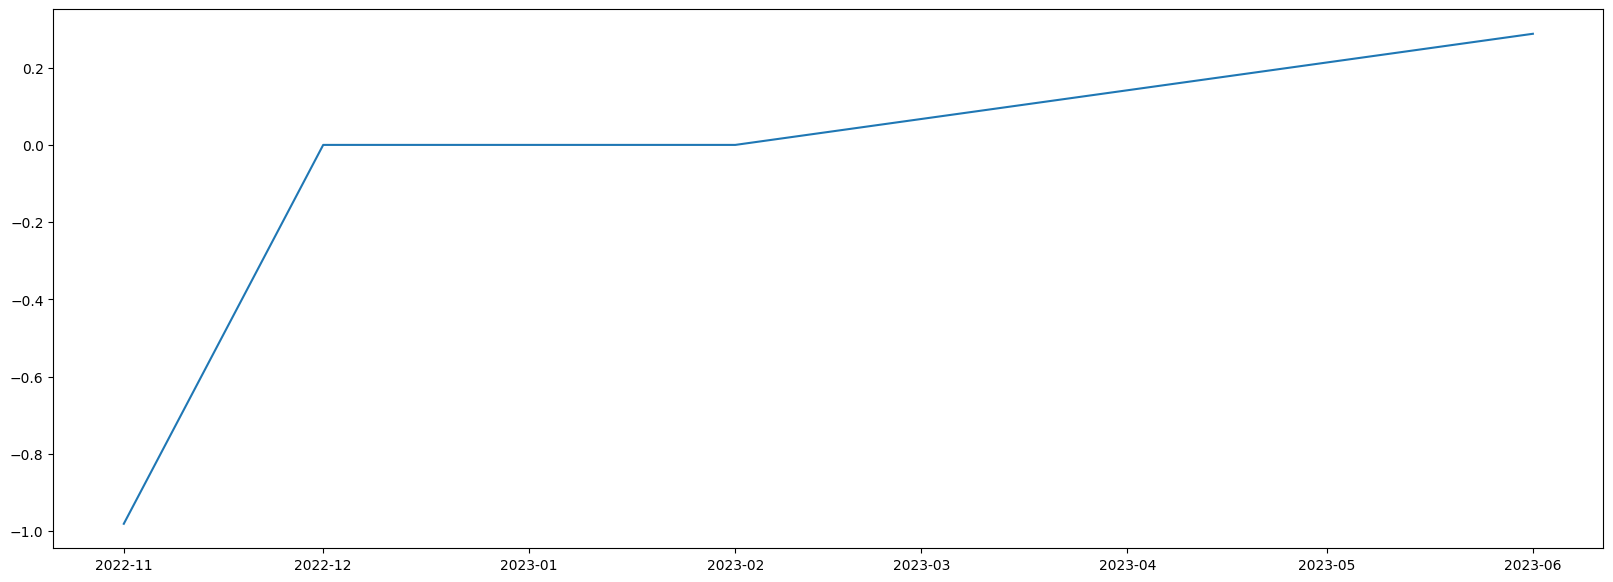

In [34]:
data = ts[ts['id'] == '9993']
merchant_data = data.sort_values(by=['month_id'])

ts_log = np.log(merchant_data['net_payment_count'])

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

In [70]:
data

,net_payment_count,id
month_id,,
2023-01-01,3,9993
2023-06-01,4,9993
2022-12-01,3,9993
2023-02-01,3,9993
2022-10-01,8,9993
2022-11-01,3,9993


/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


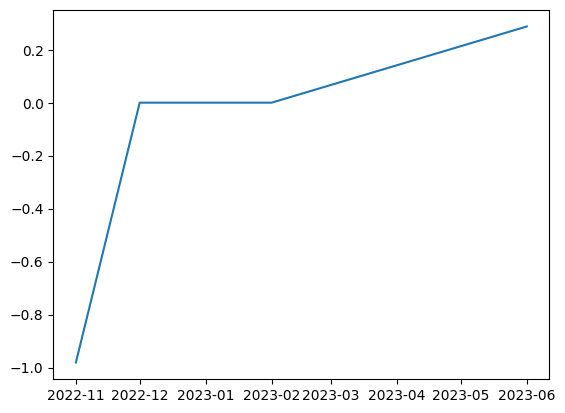

In [55]:
merchant_id = '9993'
merchant_data = ts[ts['id'] == merchant_id].sort_values(by=['month_id'])

# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.plot(ts_log_diff)

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()
    #forecast = results_ARIMA.get_forecast(steps=forecast_periods)


In [ ]:

# Tahminleri alın
start_date = ts_log.index[-3]  # 2023'ün son 3 ayı
end_date = ts_log.index[-1]
predictions = results_ARIMA.get_forecast(steps=3)
y_pred_df = predictions.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Grafik çizimi
plt.plot(merchant_data['net_payment_count'], label='Actual Data')
plt.plot(y_pred_out, color='yellow', label='ARIMA Predictions')
plt.legend()
plt.show()

In [ ]:
start_date = ts_log.index[-3]  # 2023'ün son 3 ayı
end_date = ts_log.index[-1]
predictions = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = predictions.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=start_date, end=end_date)

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Tahminleri DataFrame olarak oluşturun
prediction_df = pd.DataFrame({
    'Actual_Data': merchant_data['net_payment_count'][-3:].values,
    'ARIMA_Predictions': y_pred_out.values,
}, index=ts_log.index[-3:])

# Tahminleri göster
print(prediction_df)

In [76]:
ts_log

month_id
2022-10-01    2.079442
2022-11-01    1.098612
2022-12-01    1.098612
2023-01-01    1.098612
2023-02-01    1.098612
2023-06-01    1.386294
Name: net_payment_count, dtype: float64

In [78]:
end_date

Timestamp('2023-06-01 00:00:00')

In [90]:
start_date

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-06-01'], dtype='datetime64[ns]', name='month_id', freq=None)

In [89]:
start_date = ts_log.index[-3:]  # 2023'ün son 3 ayı
end_date = ts_log.index[-1]

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

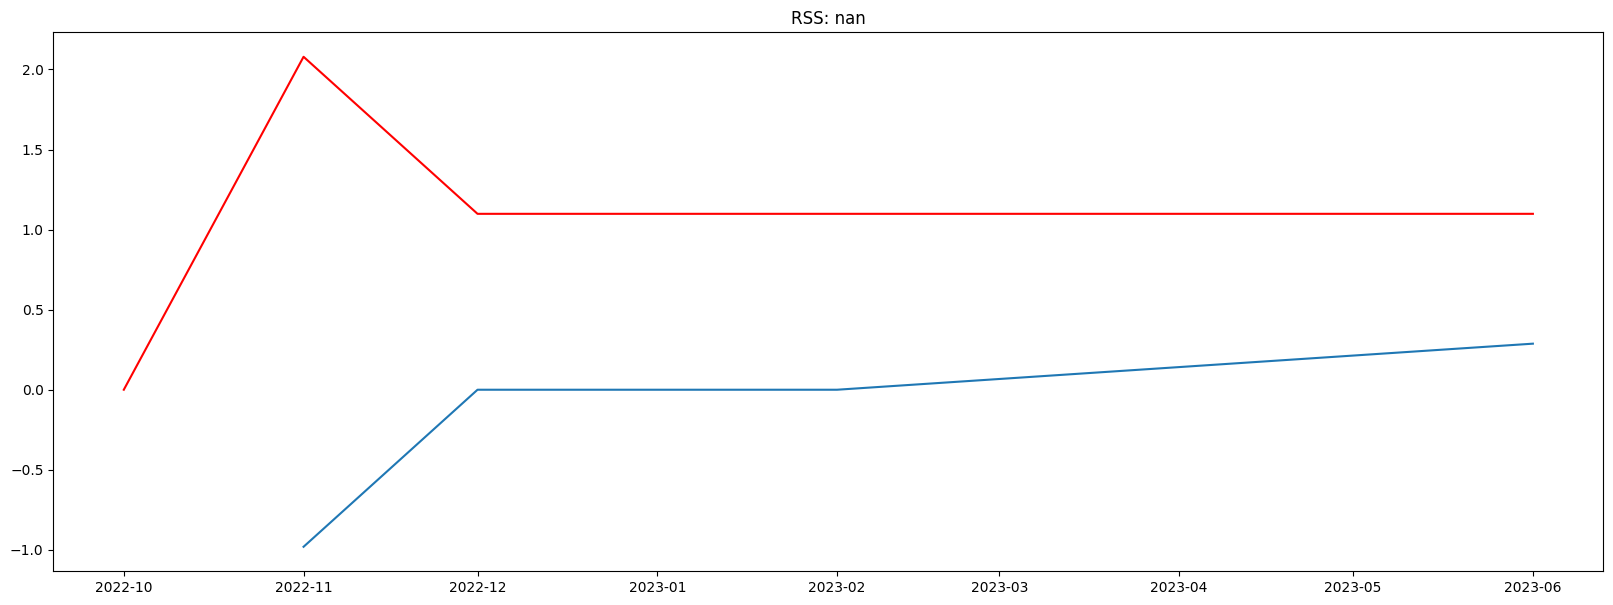

In [60]:

model = sm.tsa.arima.ARIMA(ts_log, order=(0, 1, 1))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [47]:

y_pred = results_ARIMA.get_forecast(steps = 3)
#forecast = forecast_result.predicted_mean
y_pred

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#y_pred = model.get_forecast(len(ts.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = results_ARIMA.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = ts.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [ ]:
# İlk farkı alalım (differencing)
ts_log_diff = ts_log.diff().dropna()

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(0, 1, 1))
results_ARIMA = model.fit()

# Tahminleri alın
y_pred = results_ARIMA.get_forecast(steps=len(ts_log_diff))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = results_ARIMA.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

# Tahminleri indeks ile eşleştirin
y_pred_df.index = ts_log.index[1:]  # Fark aldığımız için birinci indeksi atladık
y_pred_out = np.exp(y_pred_df["Predictions"])  # Eğer log dönüşümü uygulandıysa, orijinal ölçekteki değerlere çevirin

# Grafik çizimi
plt.plot(ts, label='Actual Data')
plt.plot(y_pred_out, color='yellow', label='ARIMA Predictions')
plt.legend()
plt.show()

In [62]:
y_pred_df["Predictions"]

month_id
2022-10-01    1.386293
2021-08-01    1.386293
2022-03-01    1.386293
2021-11-01    1.386293
2022-04-01    1.386293
                ...   
2023-06-01    1.386293
2022-12-01    1.386293
2023-02-01    1.386293
2022-10-01    1.386293
2022-11-01    1.386293
Name: Predictions, Length: 291142, dtype: float64

In [51]:
y_pred_df

net_payment_count,mean,mean_se,mean_ci_lower,mean_ci_upper
6,1.386294,0.457114,0.490368,2.282221
7,1.386295,0.646456,0.119263,2.653326
8,1.386295,0.791744,-0.165496,2.938085
9,1.386295,0.914228,-0.405559,3.178148
10,1.386295,1.022138,-0.617059,3.389648
11,1.386295,1.119696,-0.808269,3.580858


In [44]:
print(ts_log.index)


DatetimeIndex(['2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-06-01'],
              dtype='datetime64[ns]', name='month_id', freq=None)


In [73]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

Text(0.5, 1.0, 'Time Series')

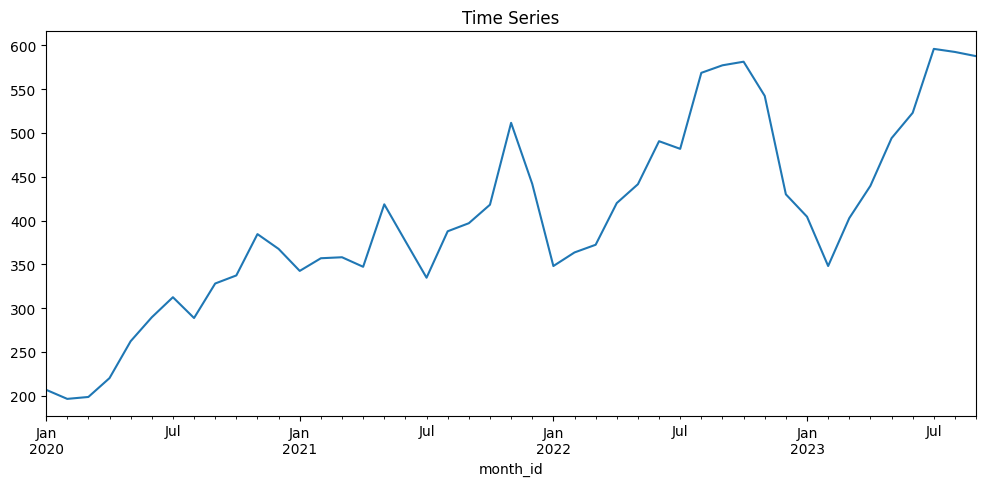

In [258]:
dategroup=ts.groupby(ts.index).mean()
plt.figure(figsize=(12,5))
dategroup['net_payment_count'].plot(x=ts.index)
plt.title('Time Series')

In [42]:
ts[:'2020-02']

,net_payment_count,id
month_id,,
2020-01-01,3,10005
2020-02-01,4,10005
2020-02-01,5,10034
2020-01-01,5,10034
2020-01-01,5,10052
...,...,...
2020-02-01,15,9938
2020-01-01,16,9938
2020-01-01,3,9942
